### **作業1:**


---



練習使用一個民生物聯網API，例如空氣、地震等感測站所回傳的紀錄資料，參考資料網址 https://ci.taiwan.gov.tw/dsp/environmental.aspx


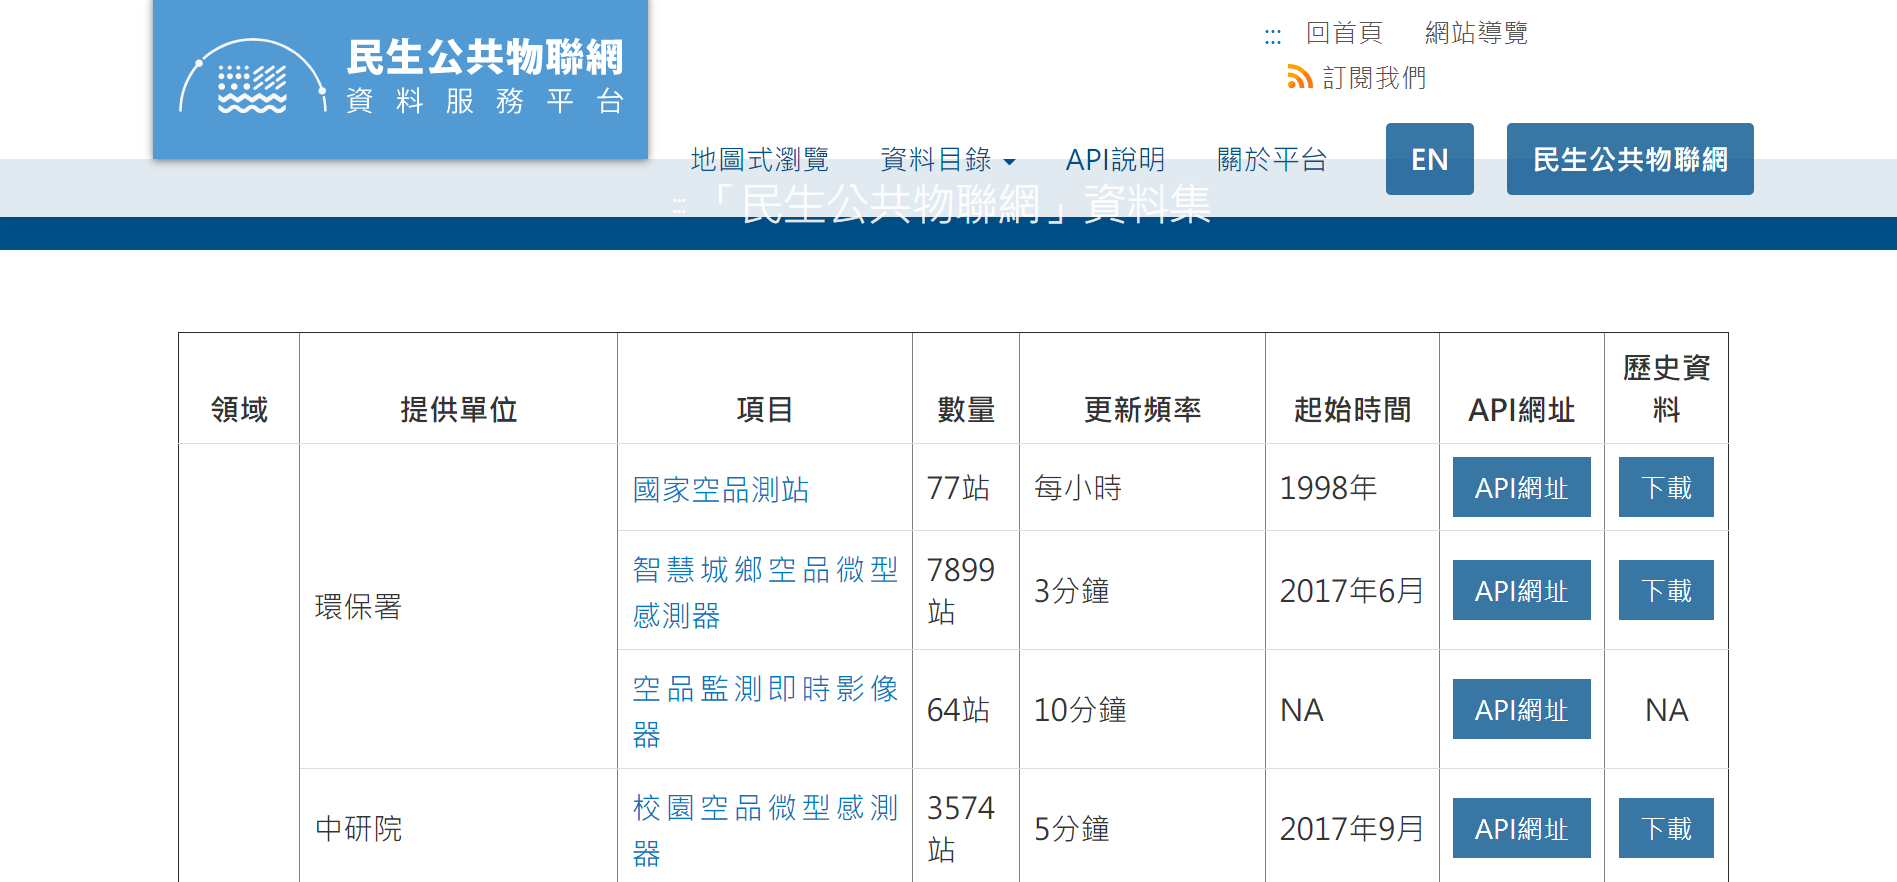

### ***解答***

---




以中研院"校園空品微型感測器"為例，先點選"API網址"，將出現下列選單

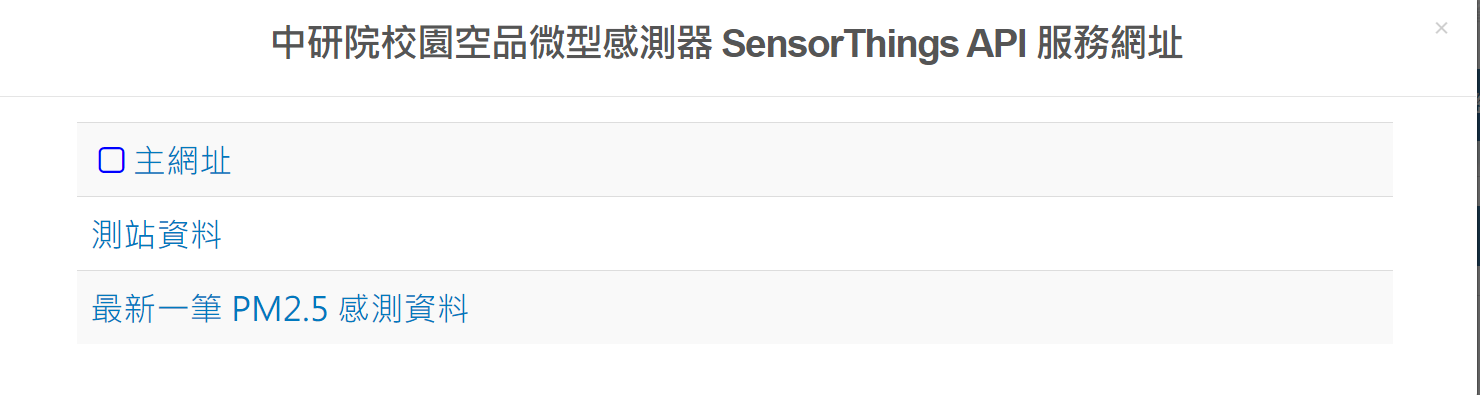

**點選 "主網址"，將出現下列畫面；**

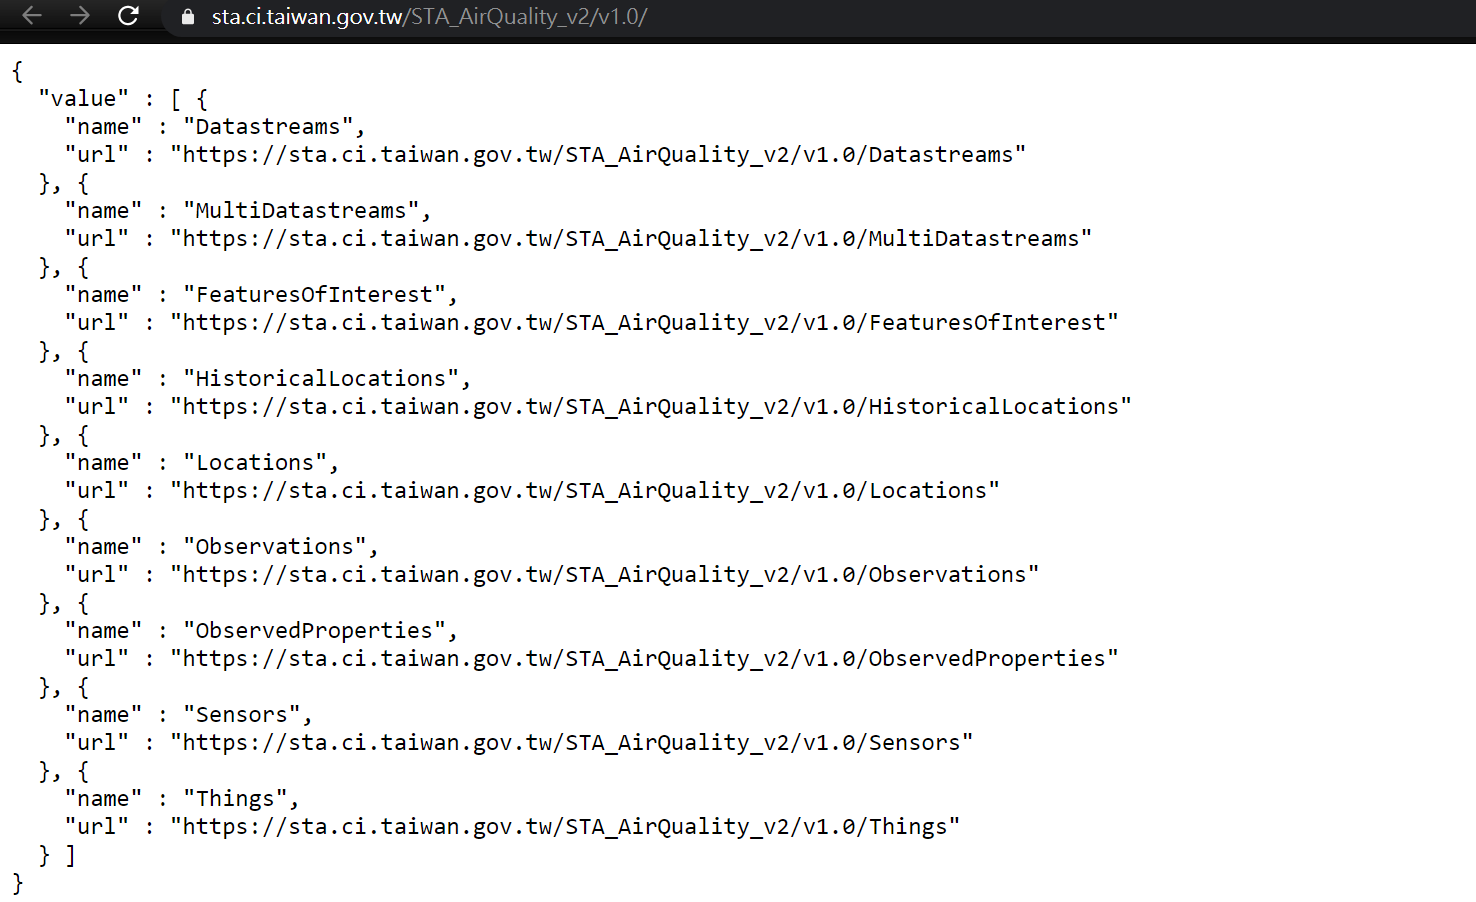

可以發現主要的資料描述進入點為，https://sta.ci.taiwan.gov.tw/STA_AirQuality_v2/v1.0/

如果要直接獲得最新的一筆個測站的感測器數值，可直接點選"#最新一筆 PM2.5 感測資料"，即可下載最新的各個測站的感測器數值。

In [ ]:
# 點選這個網址，取得最新一筆PM2.5感測資料

https://sta.ci.taiwan.gov.tw/STA_AirQuality_v2/v1.0/Datastreams?$expand=Thing,Observations($orderby=phenomenonTime%20desc;$top=1)&$filter=name%20eq%20%27PM2.5%27%20and%20Thing/properties/authority%20eq%20%27%E4%B8%AD%E7%A0%94%E9%99%A2%27%20and%20substringof(%27%E7%A9%BA%E5%93%81%E5%BE%AE%E5%9E%8B%E6%84%9F%E6%B8%AC%E5%99%A8%27,Thing/name)&$count=true

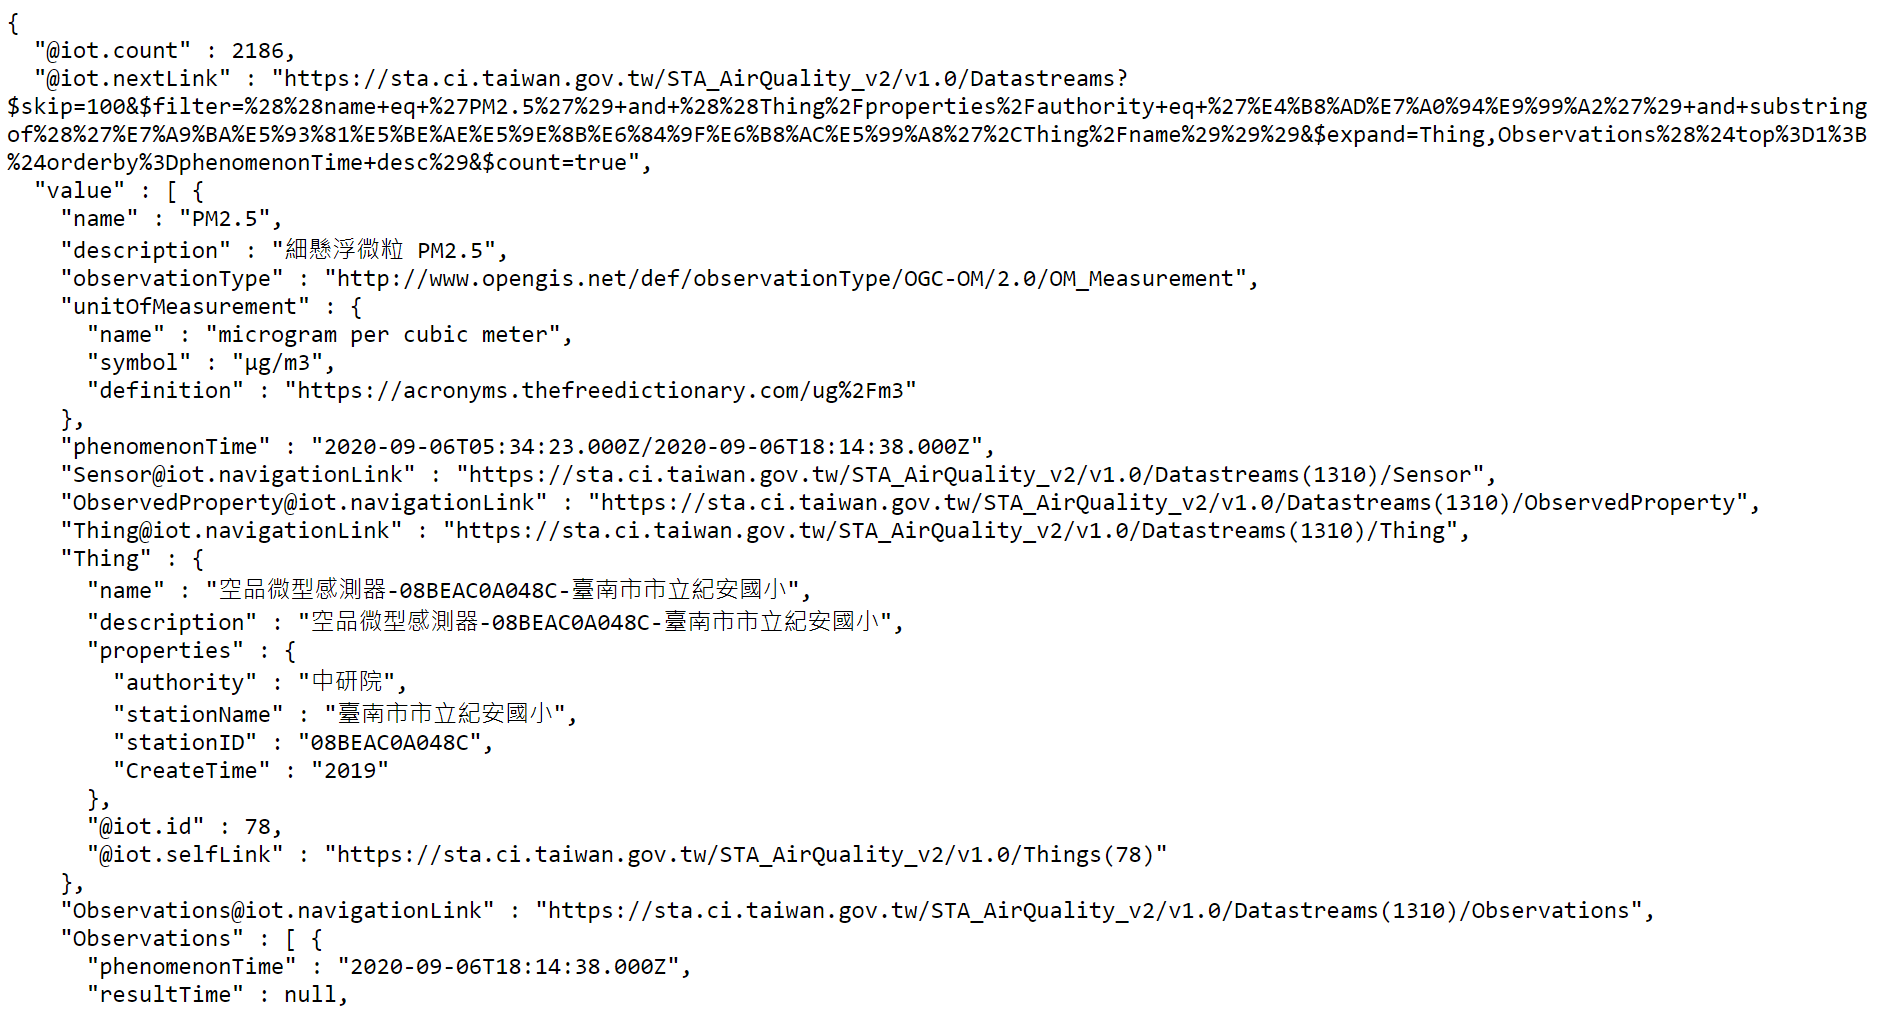

### **作業2:**


---



 練習操作OGC SensorThings API，將環保局測站位置的資料抓取下來，並且觀察下載資料的內容，參考網址為https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things

In [ ]:
# 點選網址
https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things


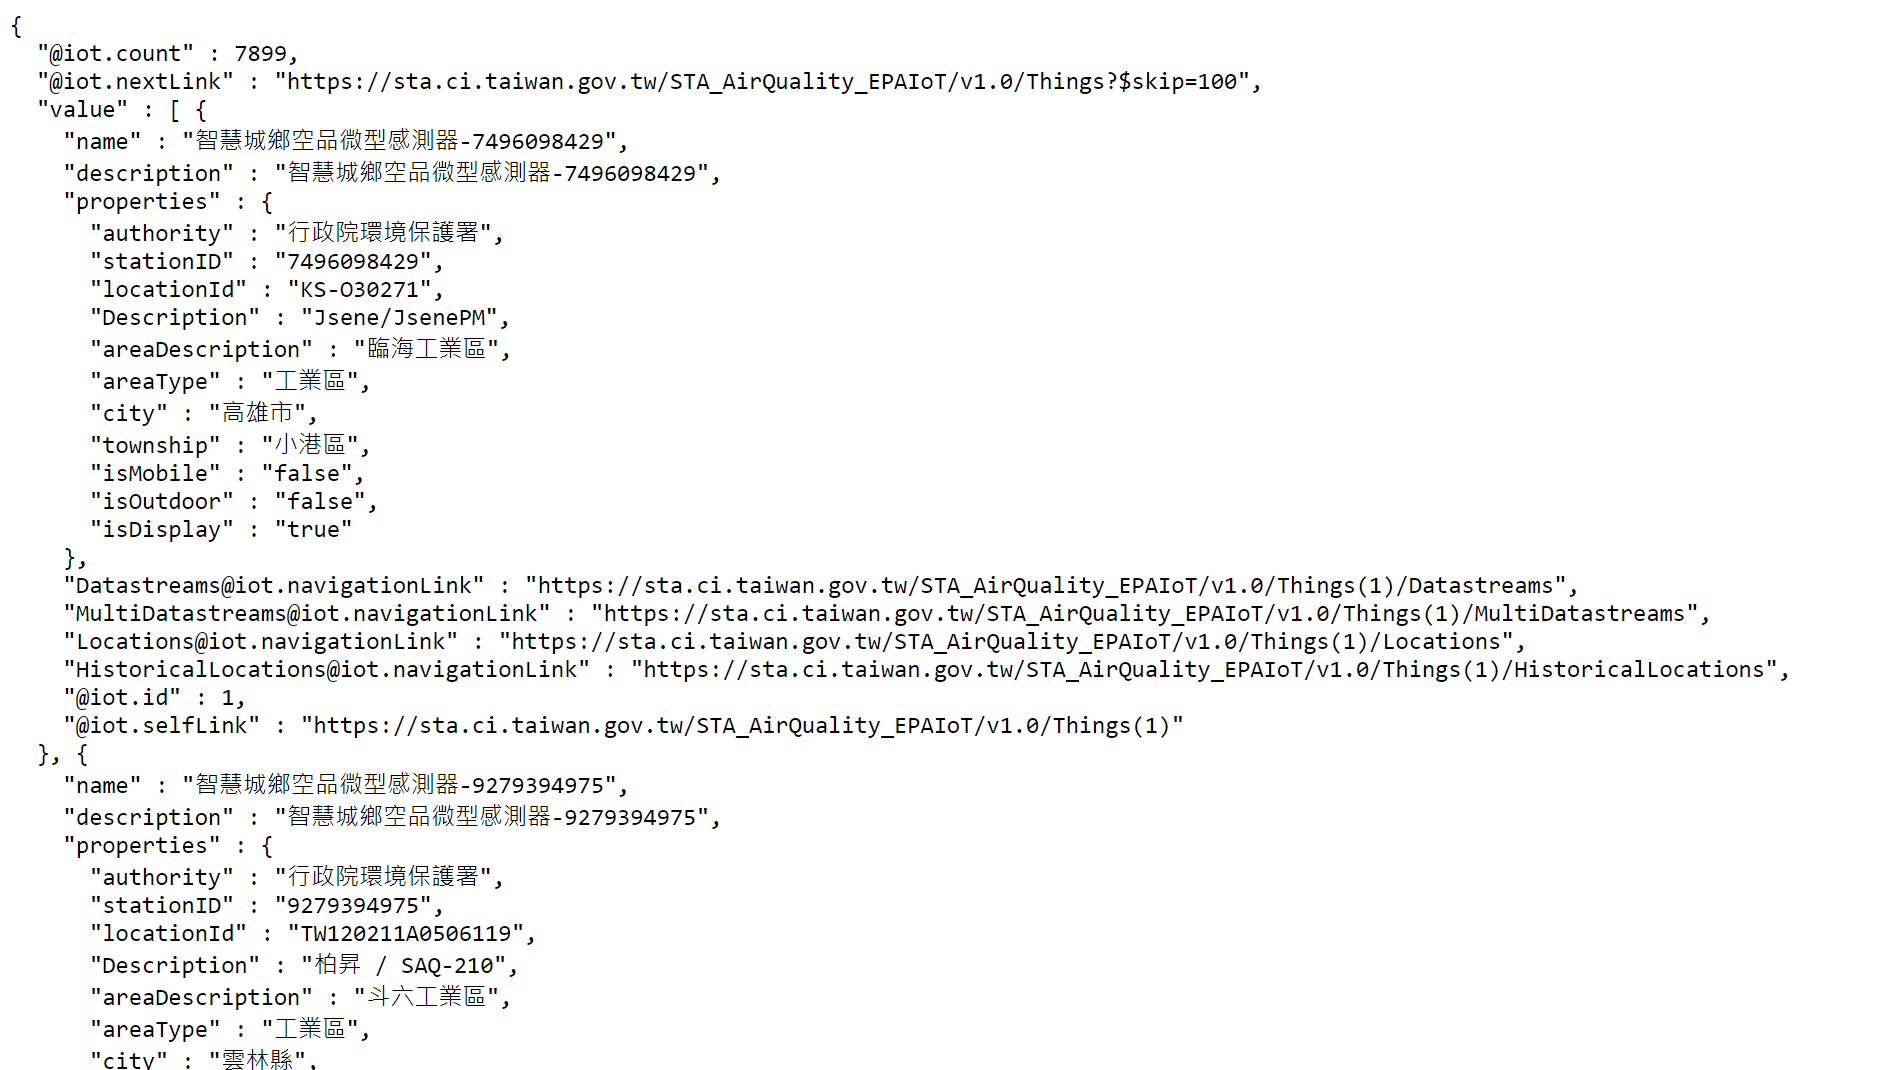

***講解如下：***

---



"@iot.count" : 7899
顯示目前共有7899筆資料在此次下載的網址中

"@iot.nextLink" : "https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things?$skip=100 ", 目前顯示的資料為前100筆，可以點選此連結，下載第101到200筆的資料

"value": [[ 資料陣列 ]]
各個資料透過json array的形式傳送

# ***作業三***

---



# 單筆資料描述說明

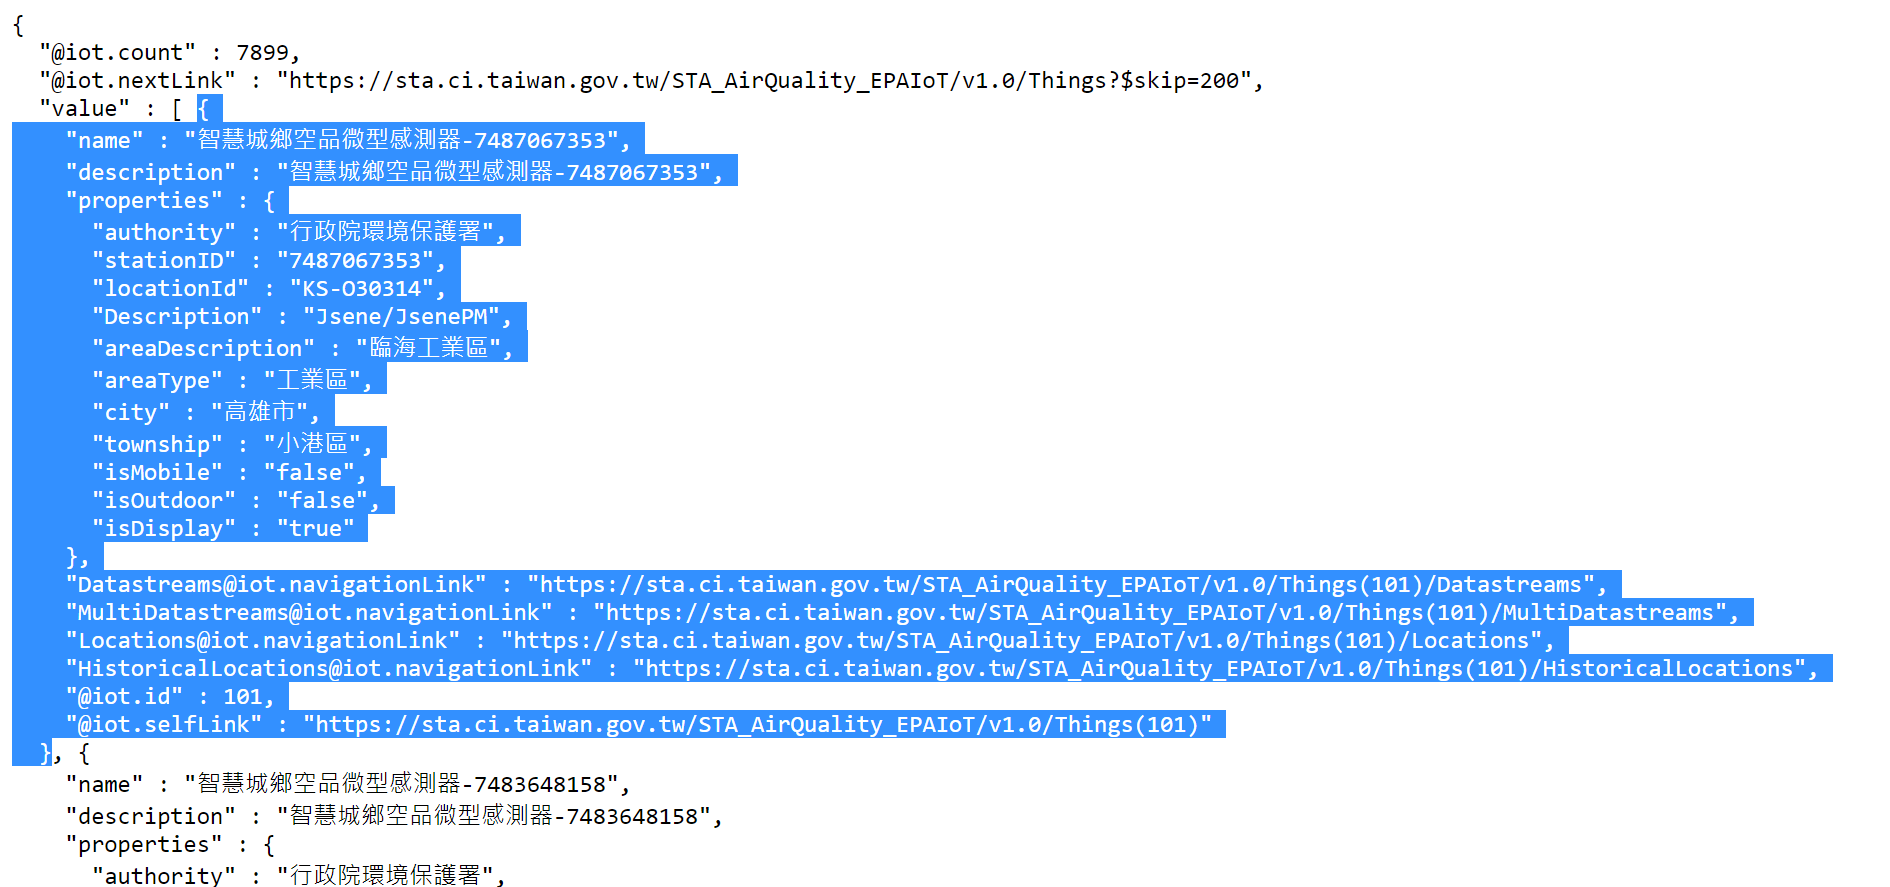

上面框起來的地方就是一筆資料的內容，包含name, description, properties, Datastreams@iot.navigationLink, MultiDatastreams@iot.navigationLink, Locations@iot.navigationLink, HistoricalLocations@iot.navigationLink, @iot.id, @iot.selfLink等屬性內容

其中@iot.id是除存在資料庫中的物件編號id, 可以透過此id直接存取明確的單一資料, 可直接透過 @iot.selfLink，來取得別的資料內容。如: https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things(101)

# 點選  https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things(101)
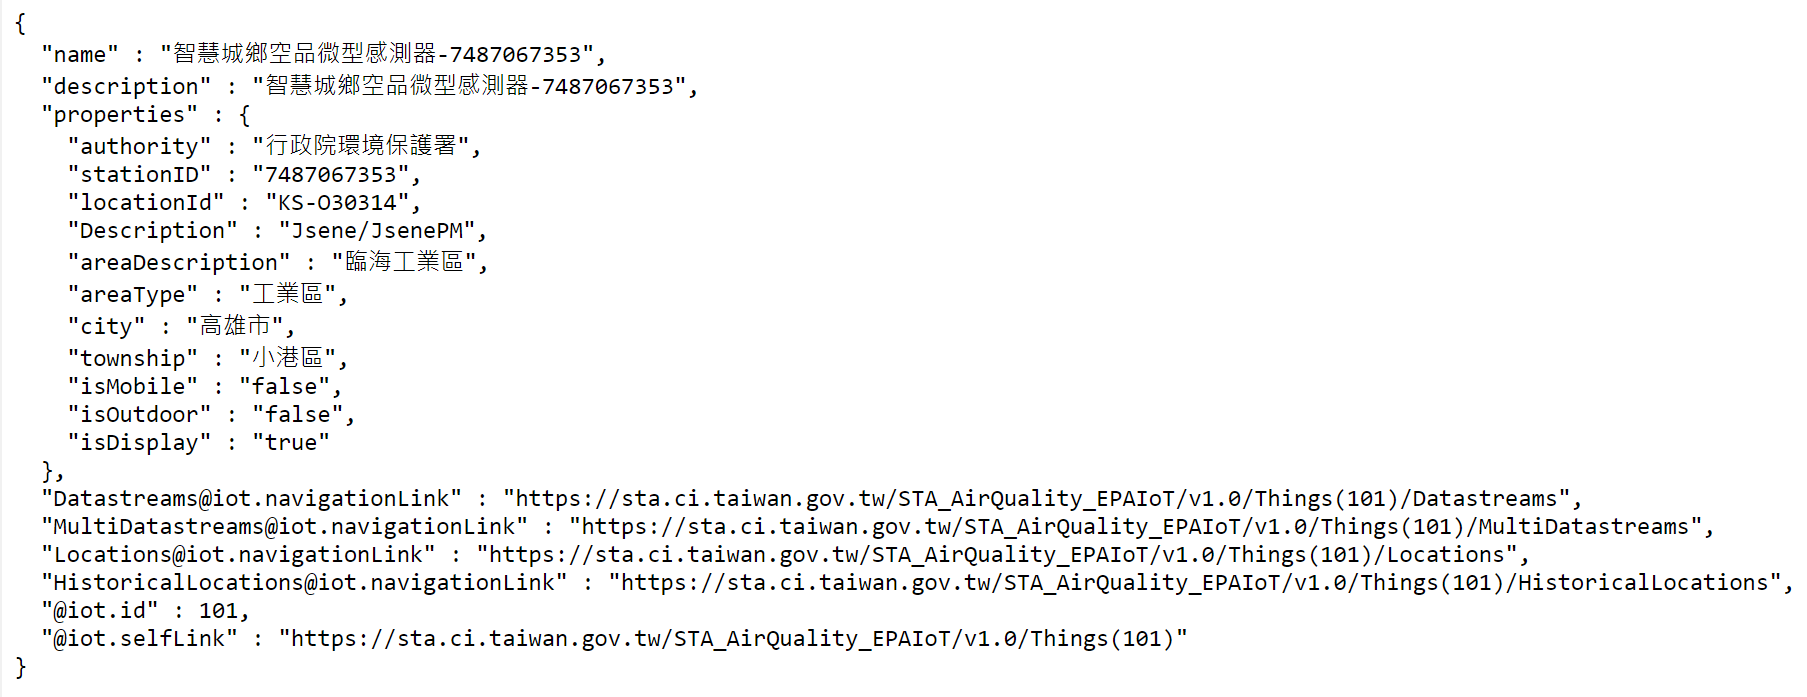

以上的資料是一筆資料的內容，可以看見除了資料本身的描述外，同時有Datastreams@iot.navigationLink, MultiDatastreams@iot.navigationLink, Locations@iot.navigationLink, HistoricalLocations@iot.navigationLink等欄位的內容，可以點選Datastreams@iot.navigationLink，即可獲得各個測站的各種感測器描述，可以依照這樣的描述觀察各個測站分別有哪些感測器，以及各個感測器量測的物理量以及單位。點選
https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Things(101)/Datastreams

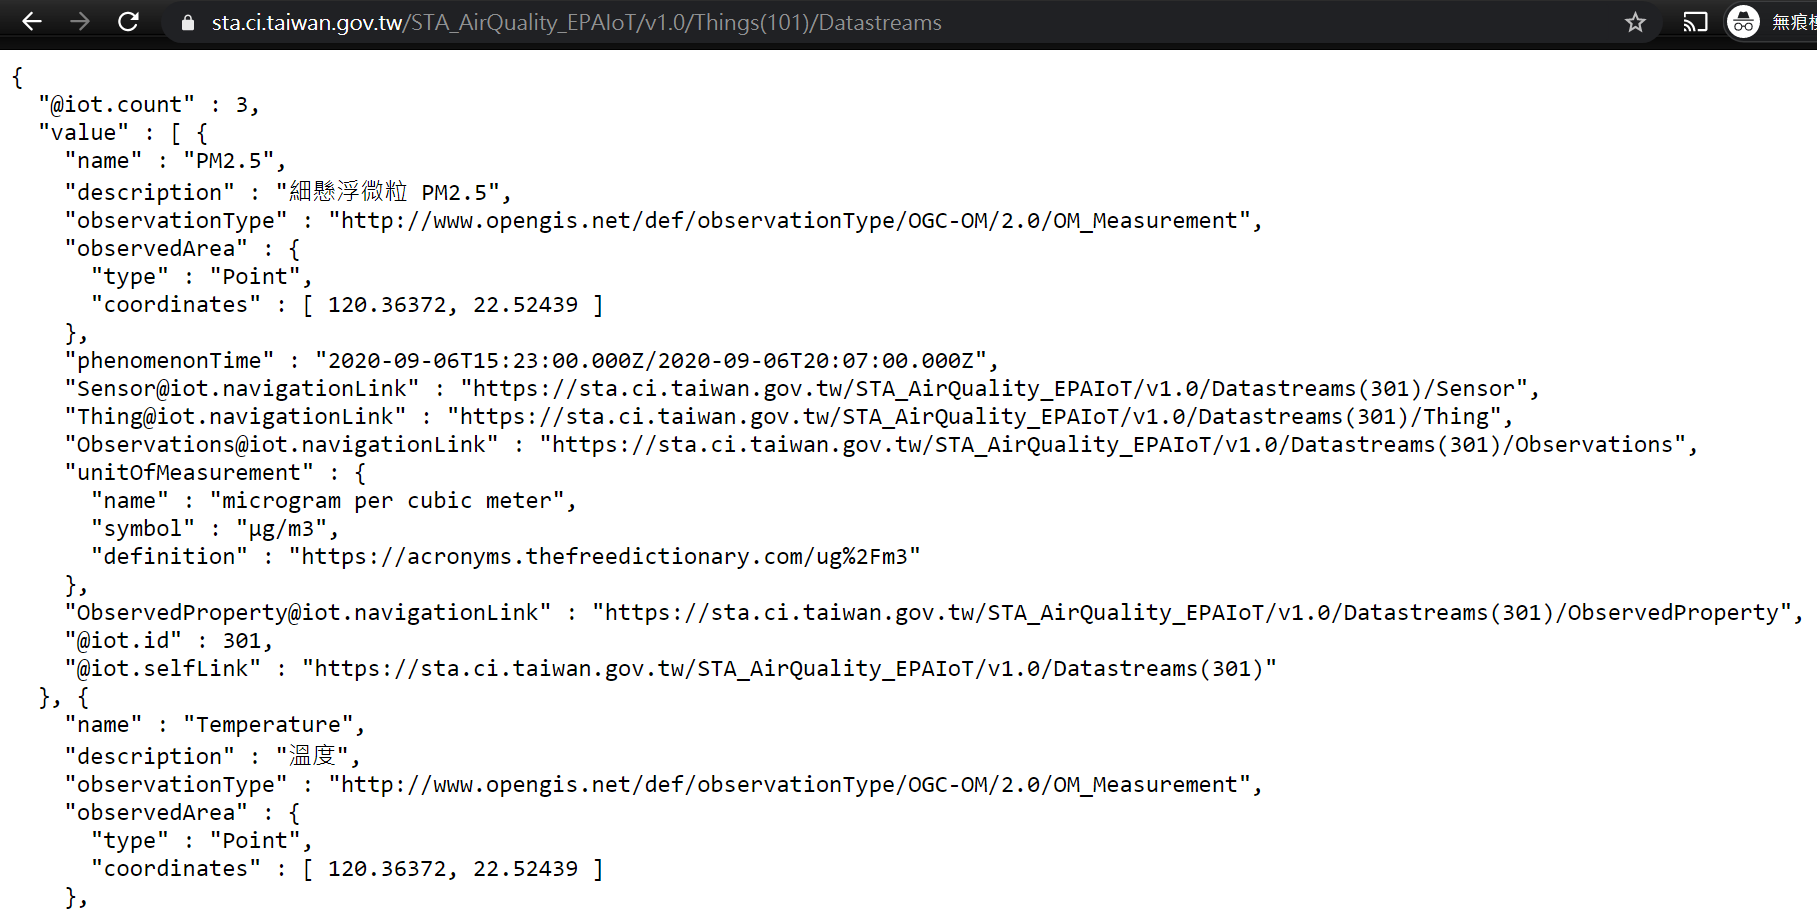

其中 Observations@iot.navigationLink, 即為各個感測器目前觀察到的感測值，我們可以透過各個Datastreams內含的Observations所指向的連結，即可取得各個感測器所量測到的觀察值。例如點選: https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Datastreams(301)/Observations

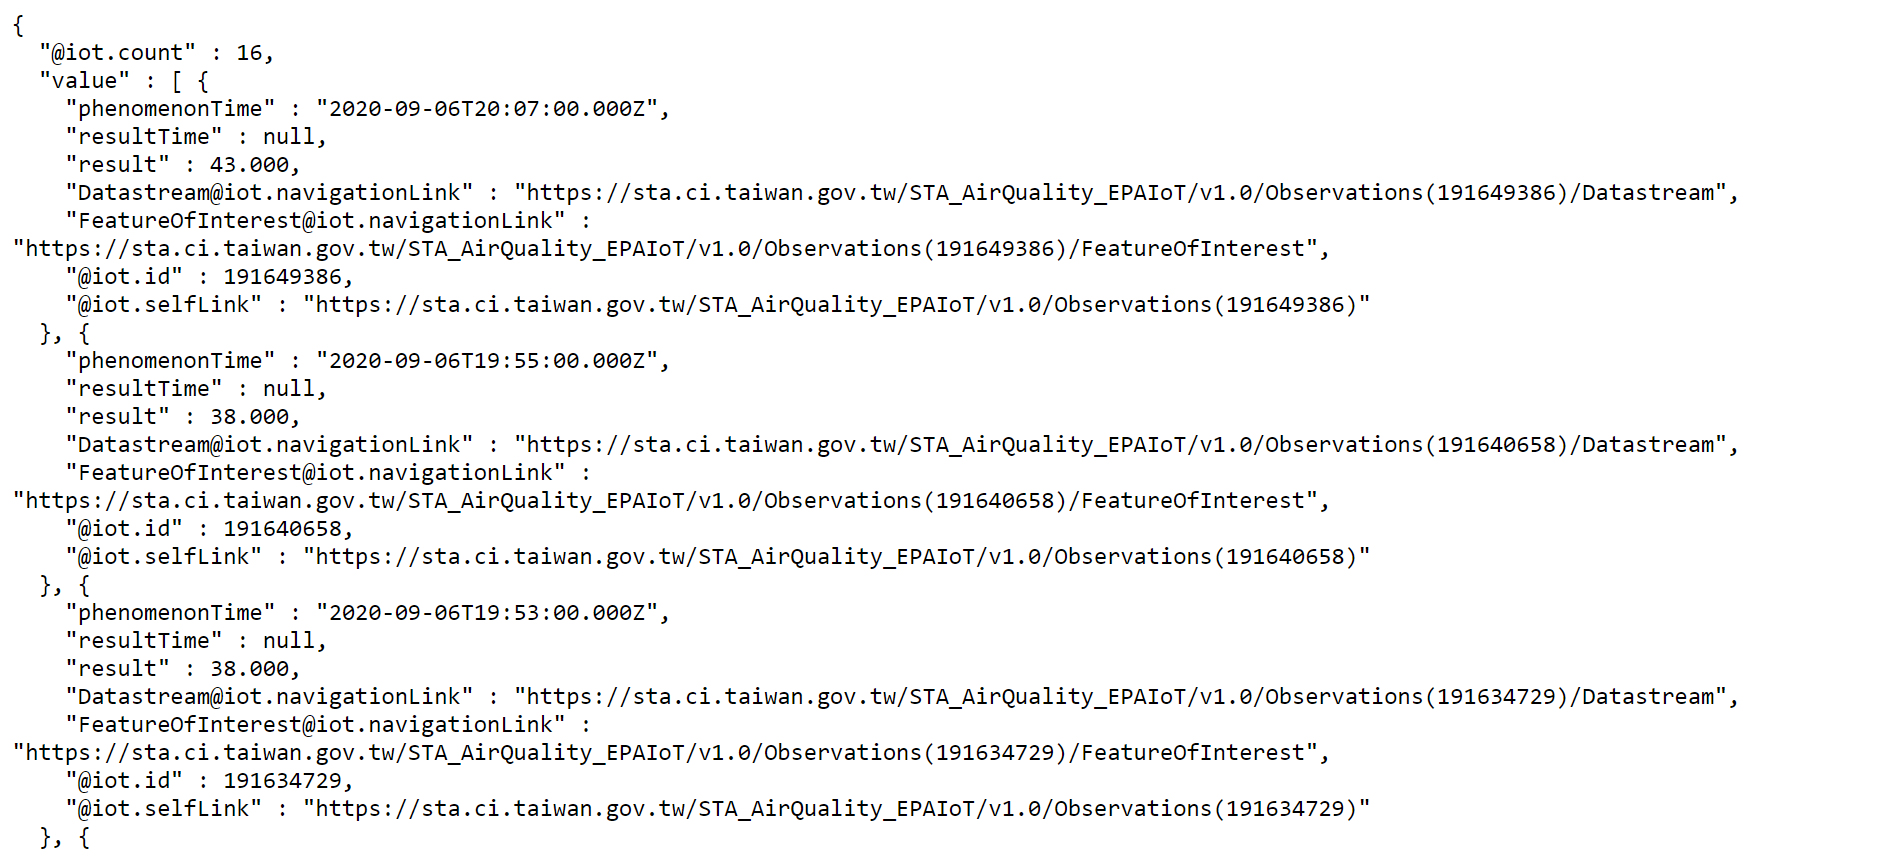

可以獲得某一個感測器過去的感測資料，包含感測的時間，同時可以反查是哪個Datastreams@iot.navigationLink, 以及FeatureOfInterest@iot.navigationLink，對應此筆觀察資料。
最後可以透過FeatureOfInterest@iot.navigationLink來觀察此筆觀察資料屬於那一個感興趣的區域範圍內的資料。點選https://sta.ci.taiwan.gov.tw/STA_AirQuality_EPAIoT/v1.0/Observations(191649386)/FeatureOfInterest

最後會得到如下的畫面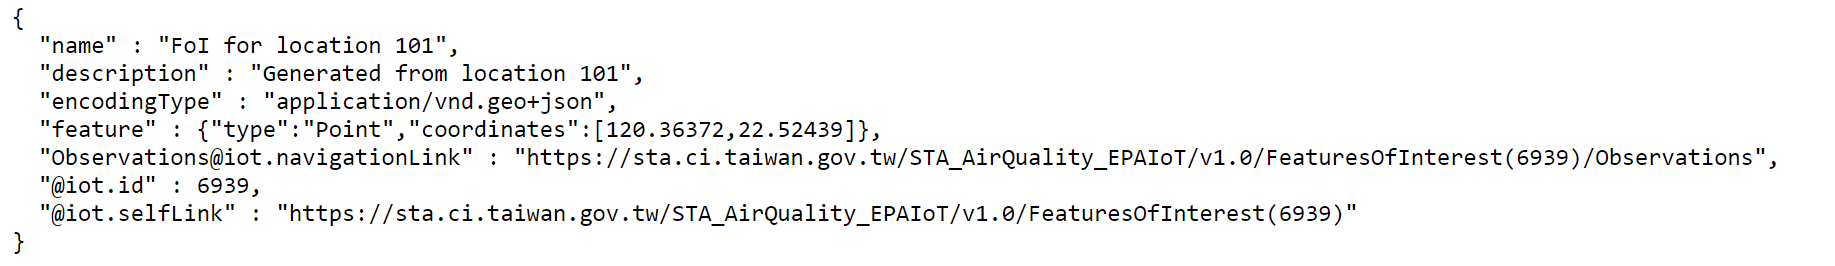

可以看出前面感測器所感測到的資料，對應的是座標點120.36372, 22.52439位置的感測器數值。


因此我們可以知道，透過OGC SensorThings API，可以有系統的獲得一個區域內感測器的數量，以及感測器量測的數值，感測器量測的物理單位以及時間，從而可以有系統的透過單一的標準界面，取得各式各樣的感測器資料以及感測的時間與位置資訊，更進一步的未來可以透過空間查詢的方式，查詢一個區域內包含的各種感測器數量，例如街道形狀周圍10公尺的感測器，以及河流附近的感測器數值等。(採用不規則形狀的查詢）